In [9]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

X0[:10]

array([[-0.56511345],
       [ 1.81256131],
       [-1.33619806],
       [ 1.74890611],
       [-0.19702637],
       [-0.97174619],
       [ 0.09145142],
       [-0.81781175],
       [ 1.02115611],
       [-0.37608967]])

In [10]:
y[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

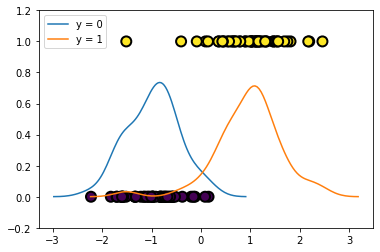

In [11]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [15]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.768     
Dependent Variable: y                AIC:              36.1687   
Date:               2020-01-09 11:14 BIC:              41.3791   
No. Observations:   100              Log-Likelihood:   -16.084   
Df Model:           1                LL-Null:          -69.295   
Df Residuals:       98               LLR p-value:      5.9631e-25
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
const    0.2515      0.4770    0.5272    0.5981    -0.6835    1.1864
x1       4.2382      0.9020    4.6986    0.0000     2.4703    6.0062
=================================================================

"""

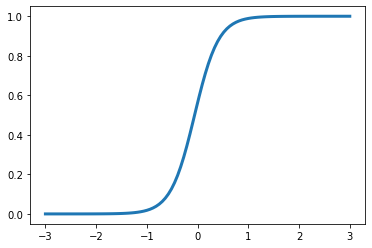

In [17]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)


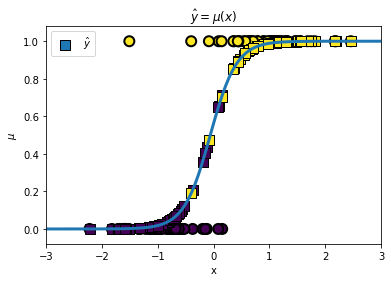

In [19]:
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

### scikit-learn

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(X0, y)
model

c:\users\iwannab1\anaconda3\envs\edu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model.score(X0, y)

0.95

In [23]:
model.predict(X0)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [32]:
model.predict_proba(X0)

array([[8.20969485e-01, 1.79030515e-01],
       [4.63267563e-03, 9.95367324e-01],
       [9.77208514e-01, 2.27914865e-02],
       [5.56631532e-03, 9.94433685e-01],
       [6.12027062e-01, 3.87972938e-01],
       [9.37130580e-01, 6.28694202e-02],
       [4.06016060e-01, 5.93983940e-01],
       [9.05124328e-01, 9.48756721e-02],
       [4.41214698e-02, 9.55878530e-01],
       [7.26104544e-01, 2.73895456e-01],
       [8.50683606e-01, 1.49316394e-01],
       [3.60938434e-02, 9.63906157e-01],
       [9.48635138e-01, 5.13648625e-02],
       [9.94336742e-01, 5.66325799e-03],
       [1.14045410e-01, 8.85954590e-01],
       [9.77326154e-01, 2.26738459e-02],
       [4.19054546e-02, 9.58094545e-01],
       [4.32178792e-02, 9.56782121e-01],
       [1.24700735e-02, 9.87529927e-01],
       [2.61902559e-02, 9.73809744e-01],
       [9.89275051e-01, 1.07249488e-02],
       [5.58994326e-01, 4.41005674e-01],
       [3.31928041e-02, 9.66807196e-01],
       [9.68111862e-01, 3.18881382e-02],
       [1.291184

In [31]:
pd.options.display.float_format = '{:.5f}'.format
pd.DataFrame(model.predict_proba(X0))

,0,1
0,0.82097,0.17903
1,0.00463,0.99537
2,0.97721,0.02279
3,0.00557,0.99443
4,0.61203,0.38797
...,...,...
95,0.89511,0.10489
96,0.88250,0.11750
97,0.87733,0.12267
98,0.86445,0.13555
